In [1]:
# train_symptom_checker_model.py

# === Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [2]:

# === Load and Inspect the Dataset ===
df = pd.read_csv('dataset/Symptom_Checker/Training.csv')
df_drugs = pd.read_csv('dataset/Drug_Drug Interactions/db_drug_interactions.csv')

print("Sample symptom dataset:\n", df.head())
print("Missing values:\n", df.isnull().sum())



Sample symptom dataset:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0          

In [3]:

# === Encode Target Variable ===
label_encoder = LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])

print("\nEncoded prognosis:\n", df.head())
print("\nPrognosis classes:\n", label_encoder.classes_)

# === Split Dataset ===
X = df.drop(columns=['prognosis'])
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Initialize and Train the Random Forest Classifier ===
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)



Encoded prognosis:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0  

In [5]:

# === Cross-Validation ===
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

# === Train Model ===
rf_model.fit(X_train, y_train)

# === Make Predictions ===
y_pred = rf_model.predict(X_test)

# === Evaluation ===
accuracy = accuracy_score(y_test, y_pred)
print(f"\nInitial Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Feature Importance ===
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_10_features = X.columns[sorted_idx][:10]
print("\nTop 10 important features:")
print(top_10_features)




Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
Standard Deviation: 0.00

Initial Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00

Optimized Model Accuracy: 100.00%


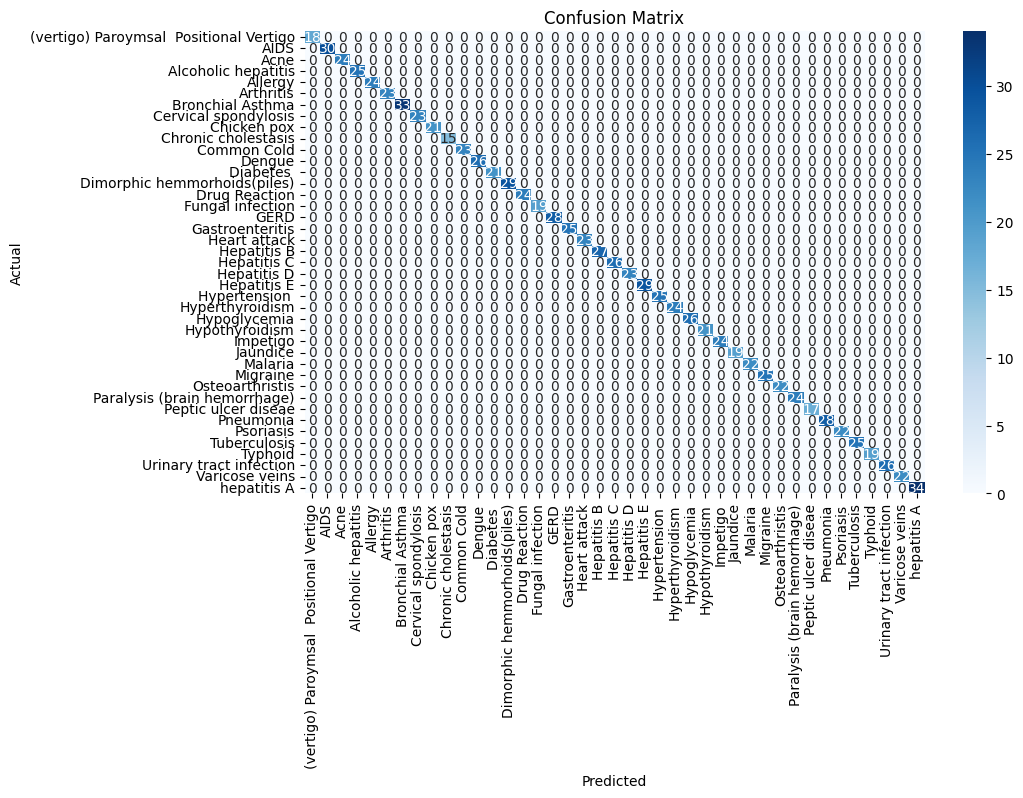

In [7]:

# === Evaluate Optimized Model ===
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized * 100:.2f}%")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:

# === AUC Score (Multi-class ROC AUC) ===
auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test), multi_class='ovr')
print(f"\nAUC Score: {auc:.4f}")

# === Save the Final Model ===
joblib.dump(best_rf_model, 'symptom_checker_model.pkl')
print("\nModel saved as 'symptom_checker_model.pkl'")
# === Save Label Encoder Classes for Prediction Decoding ===
np.save('label_classes.npy', label_encoder.classes_)
print("Label classes saved as 'label_classes.npy'")


AUC Score: 1.0000

Model saved as 'symptom_checker_model.pkl'
Label classes saved as 'label_classes.npy'
